In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from threeML import *
import numpy as np
from threeML.plugins import *
from skylab.datasets import Datasets
from astropy import units as u
from imp import reload
import scipy.optimize
import mla.core
import mla.injection
import mla.spectral
import warnings
import numpy.lib.recfunctions as rf
warnings.filterwarnings("ignore")
from skylab.ps_llh import PointSourceLLH
from skylab.llh_models import PowerLawLLH,EnergyLLH
import logging
skylab_logger = logging.getLogger('skylab')
skylab_logger.setLevel(logging.CRITICAL)

import os, sys, glob, abc

def read(filelist):
    data = []
    for f in sorted(filelist):
        x = np.load(f)
        if len(data) == 0: data = x.copy()
        else: data = np.concatenate([data, x])
    return data

# Where is the dataset stored?
dataset = "/data/i3store/users/mjlarson/student_data"

# Read in all of the data files
data_files = dataset + "/IC86_*exp.npy"
exp = read(glob.glob(data_files))

# Read in all of the MC files 
sim_files = dataset + "/IC86*MC*npy"
mc = read(glob.glob(sim_files))

# Set the angular error floor to 0.2 degrees
exp['angErr'][exp['angErr']<np.deg2rad(0.2)] = np.deg2rad(0.2)
mc['angErr'][mc['angErr']<np.deg2rad(0.2)] = np.deg2rad(0.2)

exp['ra']=np.random.uniform(0,2*np.pi,size=len(exp))
grl = np.load("/data/i3store/users/mjlarson/student_data/GRL/IC86_2012_exp.npy")
livetime = np.sum(grl['livetime'])
exp=rf.append_fields(exp.copy(),
                           'sigma',
                           exp['angErr'],
                           dtypes=np.float32)
mc=rf.append_fields(mc.copy(),
                           'sigma',
                           mc['angErr'],
                           dtypes=np.float32)
exp=rf.append_fields(exp.copy(),
                           'sinDec',
                           np.sin(exp['dec']),
                           dtypes=np.float32)
mc=rf.append_fields(mc.copy(),
                           'sinDec',
                           np.sin(mc['dec']),
                           dtypes=np.float32)


Bad key "text.kerning_factor" on line 4 in
/data/disk01/home/jasonfan/miniconda3/envs/p3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution
/data/disk01/home/jasonfan/threeML/threeML/__init__.py:12: UserWarning: No DISPLAY variable set. Using backend for graphics without display (Agg)
  warnings.warn("No DISPLAY variable set. Using backend for graphics without display (Agg)")
/data/disk01/home/jasonfan/miniconda3/envs/p3/lib/python3.6/site-packages/astromodels/core/parameter.py:555: UserWarning: We have set the min_value of K to 1e-99 because there was a postive transform
  warnings.warn('We have set the min_value of %s to 1e-99 because there was a postive transform' % self.path)
/data/disk01/home/jasonfan/miniconda3/envs/p3/lib/python3.6/site-packages/astromodels/core/paramet

In [2]:
ra=np.radians(83.63)
dec=np.radians(22.0145)

In [3]:
sp=mla.spectral.PowerLaw(1e3 , 1e-9 , -2)
injector=mla.injection.PSinjector(sp,mc,background_time_profile = (56224,56324))
injector.set_backround(exp,grl,background_window=100)
injector.set_source_location(np.radians(83.63) ,np.radians(22.0145) )

In [4]:

testskylab_model=EnergyLLH()
testskylab=PointSourceLLH.upscale(exp,mc,(livetime,100),testskylab_model,seed=1)

In [5]:
testskylab.fit_source(ra,dec)

(0.0, {'nsignal': 0.0, 'gamma': 2.381880399447072})

In [6]:
in_ns=np.arange(5,101)
def injectns(inject_ns):
    result = []
    ns=inject_ns
    for i in range(100):
        tempresult=testskylab.fit_source(ra,dec,inject=injector.sample_nevents(ns), scramble=True)
        result.append((inject_ns,tempresult[1]['gamma'],tempresult[1]['nsignal'],tempresult[0]))
    return np.array(result)

In [7]:
from multiprocessing import Pool
p=Pool(30)
warnings.filterwarnings("ignore")
allresult=p.map(injectns,in_ns)

allresult=np.array(allresult)
np.save("allresult_skylab.npy",allresult)
p.close()

In [9]:
sp=mla.spectral.PowerLaw(1e3 , 1e-9 , -2.5)
injector=mla.injection.PSinjector(sp,mc,background_time_profile = (56224,56324))
injector.set_backround(exp,grl,background_window=100)
injector.set_source_location(np.radians(83.63) ,np.radians(22.0145) )
def injectns(inject_ns):
    result = []
    ns=inject_ns
    for i in range(100):
        tempresult=testskylab.fit_source(ra,dec,inject=injector.sample_nevents(ns), scramble=True)
        result.append((inject_ns,tempresult[1]['gamma'],tempresult[1]['nsignal'],tempresult[0]))
    return np.array(result)
p=Pool(30)
allresult25=p.map(injectns,in_ns)
allresult25=np.array(allresult25)
np.save("allresult2.5_skylab.npy",allresult25)
p.close()





sp=mla.spectral.PowerLaw(1e3 , 1e-9 , -3)
injector=mla.injection.PSinjector(sp,mc,background_time_profile = (56224,56324))
injector.set_backround(exp,grl,background_window=100)
injector.set_source_location(np.radians(83.63) ,np.radians(22.0145) )
def injectns(inject_ns):
    result = []
    ns=inject_ns
    for i in range(100):
        tempresult=testskylab.fit_source(ra,dec,inject=injector.sample_nevents(ns), scramble=True)
        result.append((inject_ns,tempresult[1]['gamma'],tempresult[1]['nsignal'],tempresult[0]))
    return np.array(result)
p=Pool(30)
allresult3=p.map(injectns,in_ns)
allresult3=np.array(allresult3)
np.save("allresult3_skylab.npy",allresult3)
p.close()





In [9]:
allresult=np.load("allresult_skylab.npy")
allresult25=np.load("allresult2.5_skylab.npy")
allresult3=np.load("allresult3_skylab.npy")
in_ns=np.arange(5,101)
gamma_list=[]
ts_list=[]
ns_list=[]
for i in range(allresult.shape[0]):
    ns_inject=allresult[i][0][0]
    gamma=allresult[i][:,1]
    ts=(-allresult[i][:,3])
    ns=allresult[i][:,2]
    gamma_list.append(np.array([gamma.mean(),gamma.std()]))
    ts_list.append(np.array([ts.mean(),ts.std()]))
    ns_list.append(np.array([ns.mean(),ts.std()]))

    
gamma_list=np.array(gamma_list)
ts_list=np.array(ts_list)
ns_list=np.array(ns_list)

gamma_list25=[]
ts_list25=[]
ns_list25=[]
for i in range(allresult25.shape[0]):
    ns_inject=allresult25[i][0][0]
    gamma=allresult25[i][:,1]
    ts=(-allresult25[i][:,3])
    ns=allresult25[i][:,2]
    gamma_list25.append(np.array([gamma.mean(),gamma.std()]))
    ts_list25.append(np.array([ts.mean(),ts.std()]))
    ns_list25.append(np.array([ns.mean(),ts.std()]))

    
gamma_list25=np.array(gamma_list25)
ts_list25=np.array(ts_list25)
ns_list25=np.array(ns_list25)
gamma_list3=[]
ts_list3=[]
ns_list3=[]
for i in range(allresult3.shape[0]):
    ns_inject=allresult3[i][0][0]
    gamma=allresult3[i][:,1]
    ts=(-allresult3[i][:,3])
    ns=allresult3[i][:,2]
    gamma_list3.append(np.array([gamma.mean(),gamma.std()]))
    ts_list3.append(np.array([ts.mean(),ts.std()]))
    ns_list3.append(np.array([ns.mean(),ts.std()]))

    
gamma_list3=np.array(gamma_list3)
ts_list3=np.array(ts_list3)
ns_list3=np.array(ns_list3)

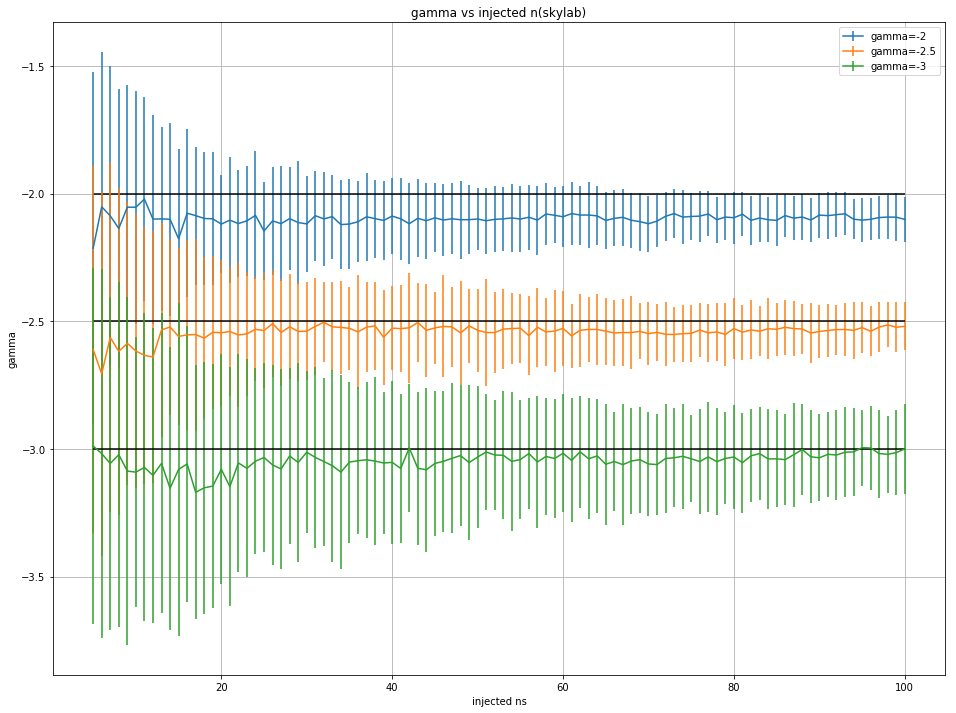

In [10]:
fig, ax = plt.subplots(figsize=(16,12))


ax.errorbar(in_ns, -gamma_list[:,0],
            yerr=gamma_list[:,1],
            fmt='-',label="gamma=-2")


ax.hlines(-2,5,100)
ax.errorbar(in_ns, -gamma_list25[:,0],
            yerr=gamma_list25[:,1],
            fmt='-',label="gamma=-2.5")
ax.hlines(-2.5,5,100)
ax.errorbar(in_ns, -gamma_list3[:,0],
            yerr=gamma_list3[:,1],
            fmt='-',label="gamma=-3")
ax.hlines(-3,5,100)
ax.set_xlabel("injected ns")
ax.set_ylabel("gamma")
ax.set_title("gamma vs injected n(skylab)")
ax.legend()
plt.grid()

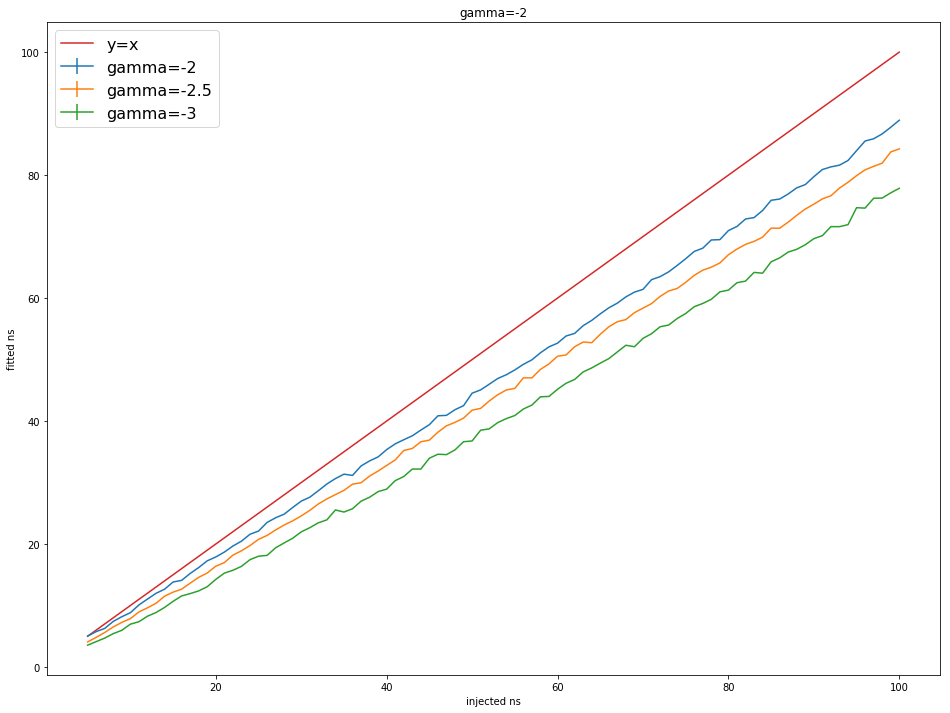

In [11]:
fig, ax = plt.subplots(figsize=(16,12))


# ax.errorbar(in_ns, ns_list[:,0],
#             yerr=ns_list[:,1],
#             fmt='-',label="gamma=-2")
# ax.errorbar(in_ns, ns_list25[:,0],
#             yerr=ns_list25[:,1],
#             fmt='-',label="gamma=-2.5")

# ax.errorbar(in_ns, ns_list3[:,0],
#             yerr=ns_list3[:,1],
#             fmt='-',label="gamma=-3")
ax.errorbar(in_ns, ns_list[:,0],
            yerr=0,
            fmt='-',label="gamma=-2")
ax.errorbar(in_ns, ns_list25[:,0],
            yerr=0,
            fmt='-',label="gamma=-2.5")

ax.errorbar(in_ns, ns_list3[:,0],
            yerr=0,
            fmt='-',label="gamma=-3")


x=np.linspace(5,100,1000)
ax.plot(x,x,label="y=x")
ax.set_xlabel("injected ns")
ax.set_ylabel("fitted ns")
ax.set_title("gamma=-2")
ax.legend(fontsize=16)

In [12]:
ns_list[:,0]

array([ 5.02883219,  5.75493507,  6.27234669,  7.41724694,  8.17851386,
        8.82663346, 10.08773802, 11.04416211, 11.97802765, 12.64744836,
       13.82189897, 14.08555148, 15.21414648, 16.17352592, 17.26898383,
       17.89312827, 18.68717316, 19.66751635, 20.46028365, 21.58372047,
       22.10949166, 23.50572215, 24.26739987, 24.85330571, 25.9403751 ,
       26.97261323, 27.61429301, 28.66588954, 29.76245057, 30.64049644,
       31.35989958, 31.1571386 , 32.68973949, 33.51686654, 34.1706359 ,
       35.35332106, 36.28912719, 36.96092907, 37.59889864, 38.53195392,
       39.41508474, 40.85382188, 40.92649792, 41.84930896, 42.50200975,
       44.52868145, 45.06771779, 45.98575031, 46.9180058 , 47.52971798,
       48.31264258, 49.22248764, 49.95812851, 51.10500219, 52.06497516,
       52.6680109 , 53.83303038, 54.2528343 , 55.51305583, 56.36798499,
       57.4318618 , 58.41466597, 59.17738068, 60.1955114 , 60.96706691,
       61.41489049, 62.99338702, 63.48493071, 64.25791747, 65.30